In [73]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rc
from matplotlib import pyplot

# os x(mac os) 한글 font 


# 노트북 안에 그래플 그리기 위해 셋팅
%matplotlib inline

# 그래프를 격자 스타일로 (숫자 범위가 눈에 잘 띄도록 ggplot 스타일 사용.)
plt.style.use("ggplot")

# 그래프에서 마이너스 폰트 깨지는 문제 해결을 위해
mpl.rcParams["axes.unicode_minus"] = False

# 경고 문구 무시
import warnings
warnings.filterwarnings(action='ignore')

from matplotlib import font_manager, rc
import platform

if platform.system() == 'Windows':
# 윈도우인 경우
    font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font_name)
else:    
# Mac 인 경우
    rc('font', family='AppleGothic')
    
mpl.rcParams['axes.unicode_minus'] = False  

In [74]:
data = pd.read_csv("시도별_연령별_성별_적용인구_현황_의료급여.csv")
medical_care = data
medical_care.head(7)

,구분별(1),구분별(2),성별(1),2019,2019.1,2019.2,2019.3,2019.4,2019.5,2019.6,...,2019.10,2019.11,2019.12,2019.13,2019.14,2019.15,2019.16,2019.17,2019.18,2019.19
0,구분별(1),구분별(2),성별(1),합계,0세,1 - 4세,5 - 9세,10 - 14세,15 - 19세,20 - 24세,...,40 - 44세,45 - 49세,50 - 54세,55 - 59세,60 - 64세,65 - 69세,70 - 74세,75 - 79세,80 - 84세,85세 이상
1,합계 (명),소계,계,1488846,2458,18156,41556,56468,89678,74129,...,57824,98622,125780,145502,146579,125688,117217,116798,94352,86377
2,합계 (명),소계,남자,686731,1259,9140,21111,28756,45400,37779,...,25505,46843,67878,85525,82748,62543,49257,40094,24701,15044
3,합계 (명),소계,여자,802115,1199,9016,20445,27712,44278,36350,...,32319,51779,57902,59977,63831,63145,67960,76704,69651,71333
4,가입구분,세대수 (세대),계,1112118,861,4971,10566,11001,18433,25485,...,46617,83241,109492,129269,131081,110953,102272,103022,85777,81852
5,가입구분,세대수 (세대),남자,534605,446,2447,5137,5304,9666,15660,...,21223,41204,62592,81019,79500,60484,47539,38491,23605,14531
6,가입구분,세대수 (세대),여자,577513,415,2524,5429,5697,8767,9825,...,25394,42037,46900,48250,51581,50469,54733,64531,62172,67321


In [75]:

idx = list(medical_care.loc[0, '2019.1':])
idx

['0세',
 '1 - 4세',
 '5 - 9세',
 '10 - 14세',
 '15 - 19세',
 '20 - 24세',
 '25 - 29세',
 '30 - 34세',
 '35 - 39세',
 '40 - 44세',
 '45 - 49세',
 '50 - 54세',
 '55 - 59세',
 '60 - 64세',
 '65 - 69세',
 '70 - 74세',
 '75 - 79세',
 '80 - 84세',
 '85세 이상']

In [76]:
man_sum  = medical_care.loc[2,'2019.1':]

In [77]:
man_sum.head()

2019.1     1259
2019.2     9140
2019.3    21111
2019.4    28756
2019.5    45400
Name: 2, dtype: object

In [78]:
all_sum = medical_care.loc[1, '2019.1':]
all_sum = list(all_sum)
all_sum_list = []
for i in all_sum:
    all_sum_list.append(int(i))
print(all_sum_list)


[2458, 18156, 41556, 56468, 89678, 74129, 28982, 23542, 39138, 57824, 98622, 125780, 145502, 146579, 125688, 117217, 116798, 94352, 86377]


In [79]:
woman_sum = medical_care.loc[3,'2019.1':]
woman_sum.head()
woman_sum = list(woman_sum)
woman_sum_list = []
for i in woman_sum:
    woman_sum_list.append(int(i))
print(woman_sum_list)

[1199, 9016, 20445, 27712, 44278, 36350, 13761, 12732, 22021, 32319, 51779, 57902, 59977, 63831, 63145, 67960, 76704, 69651, 71333]


In [80]:
man_sum = medical_care.loc[2,'2019.1':]
man_sum = list(man_sum)
man_sum_list = []
for i in man_sum:
    man_sum_list.append(int(i))
print(man_sum_list)

[1259, 9140, 21111, 28756, 45400, 37779, 15221, 10810, 17117, 25505, 46843, 67878, 85525, 82748, 62543, 49257, 40094, 24701, 15044]


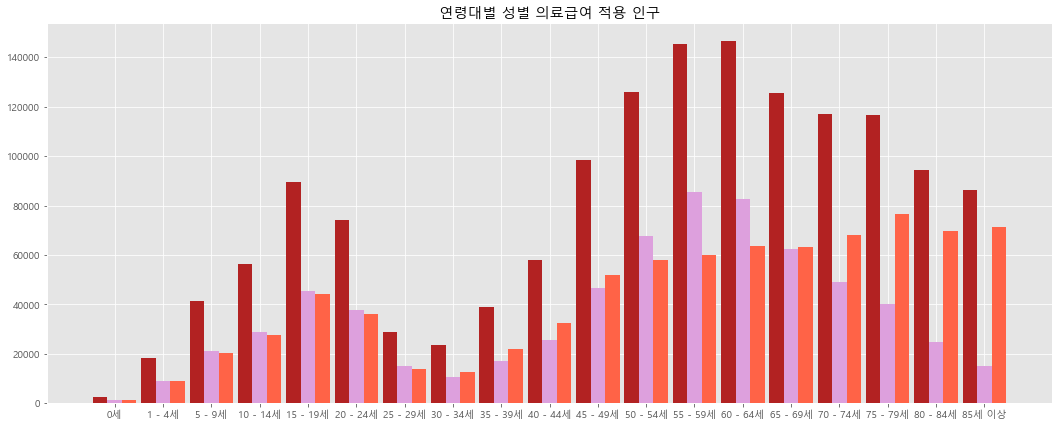

In [152]:
w_ = 0.3
plt.figure(figsize=(18,7))
x = np.arange(len(idx))
pyplot.bar(range(len(all_sum_list)), all_sum_list, width=w_, color='firebrick')
pyplot.bar([i+w_ for i in range(len(man_sum_list))], man_sum_list, width=w_, color='plum')
pyplot.bar([i+2*w_ for i in range(len(woman_sum_list))], woman_sum_list, width=w_, color='tomato')
pyplot.title("연령대별 성별 의료급여 적용 인구")
pyplot.xticks([i+w_ for i in range(len(man_sum_list))], idx)
pyplot.show()

## 성별 의료급여 적용 인구   

#### 1. 30대 중반까지는 의료급여 적용인구가 줄어들다가 이후 의료급여 적용인구가 증가한다.   

#### 2. 남성의 경우 50대 후반 60대 중반까지 의료급여 적용 인구가 꾸준히 상승하다가 이후에는 급격하게 하락한다.   

#### 3. 여성의 경우 남성과 다르게 40대 후반부터 꾸준히 의료급여 적용인구가 증가한다.

In [82]:
all_household_sum = list(medical_care.loc[4, '2019.1':])
all_household_sum_list = []

for i in all_household_sum:
    all_household_sum_list.append(int(i))
print(all_household_sum_list)

[861, 4971, 10566, 11001, 18433, 25485, 12203, 15368, 29654, 46617, 83241, 109492, 129269, 131081, 110953, 102272, 103022, 85777, 81852]


In [83]:
household_man_sum = list(medical_care.loc[5, '2019.1':])
household_man_sum_list = []

for i in household_man_sum:
    household_man_sum_list.append(int(i))
print(household_man_sum_list)

[446, 2447, 5137, 5304, 9666, 15660, 5662, 6883, 13212, 21223, 41204, 62592, 81019, 79500, 60484, 47539, 38491, 23605, 14531]


In [84]:
household_woman_sum = list(medical_care.loc[6, '2019.1':])
household_woman_sum_list = []

for i in household_woman_sum:
    household_woman_sum_list.append(int(i))
print(household_woman_sum_list)

[415, 2524, 5429, 5697, 8767, 9825, 6541, 8485, 16442, 25394, 42037, 46900, 48250, 51581, 50469, 54733, 64531, 62172, 67321]


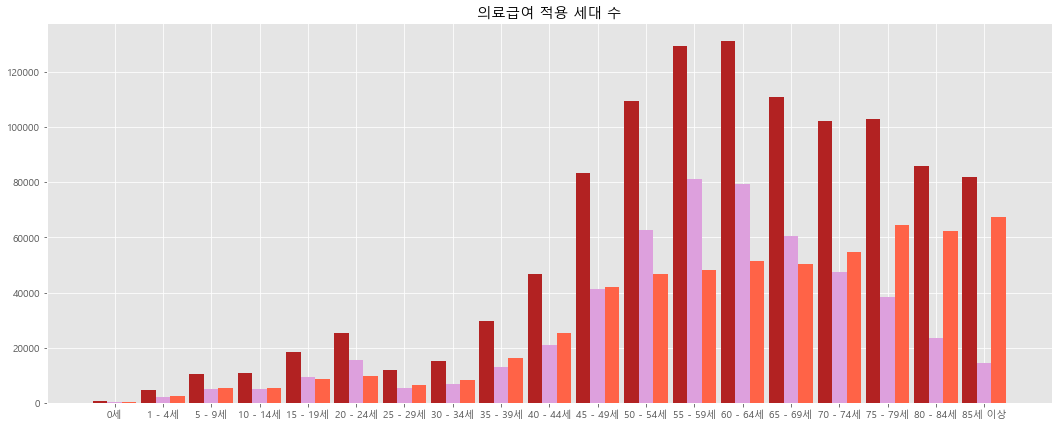

In [85]:
w_ = 0.3
plt.figure(figsize=(18,7))
x = np.arange(len(idx))
pyplot.bar(range(len(all_household_sum_list)), all_household_sum_list, width=w_, color='firebrick')
pyplot.bar([i+w_ for i in range(len(household_man_sum_list))], household_man_sum_list, width=w_, color='plum')
pyplot.bar([i+2*w_ for i in range(len(household_woman_sum_list))], household_woman_sum_list, width=w_, color='tomato')
pyplot.title("의료급여 적용 세대 수")
pyplot.xticks([i+w_ for i in range(len(household_man_sum_list))], idx)
pyplot.show()

## 의료급여 적용 세대 수
#### 1. 20대 후반이후 약간씩 증가하다가 40대 후반 이후 급격하게 의료급여 적용 세대 수가 증가한다.
#### 2. 의료급여 적용 세대 수 역시 성별 의료급여 적용 인원과 같이 50대 중반 부터 60대 중반에 최고조에 이른다.
#### 3. 여성의 경우 성별 의료급여 적용 인원과 같이 40대 후반이후 꾸준하게 증가한다.

In [86]:
all_dependents_sum = medical_care.loc[7, '2019.1':]
all_dependents_sum_list = []
for i in all_dependents_sum:
    all_dependents_sum_list.append(int(i))
print(all_dependents_sum_list)

[1597, 13185, 30990, 45467, 71245, 48644, 16779, 8174, 9484, 11207, 15381, 16288, 16233, 15498, 14735, 14945, 13776, 8575, 4525]


In [87]:
dependents_man_sum = medical_care.loc[8, '2019.1':]
dependents_man_sum_list = []
for i in dependents_man_sum:
    dependents_man_sum_list.append(int(i))
print(dependents_man_sum_list)

[813, 6693, 15974, 23452, 35734, 22119, 9559, 3927, 3905, 4282, 5639, 5286, 4506, 3248, 2059, 1718, 1603, 1096, 513]


In [88]:
dependents_woman_sum = medical_care.loc[9, '2019.1':]
dependents_woman_sum_list = []
for i in dependents_woman_sum:
    dependents_woman_sum_list.append(int(i))
print(dependents_woman_sum_list)

[784, 6492, 15016, 22015, 35511, 26525, 7220, 4247, 5579, 6925, 9742, 11002, 11727, 12250, 12676, 13227, 12173, 7479, 4012]


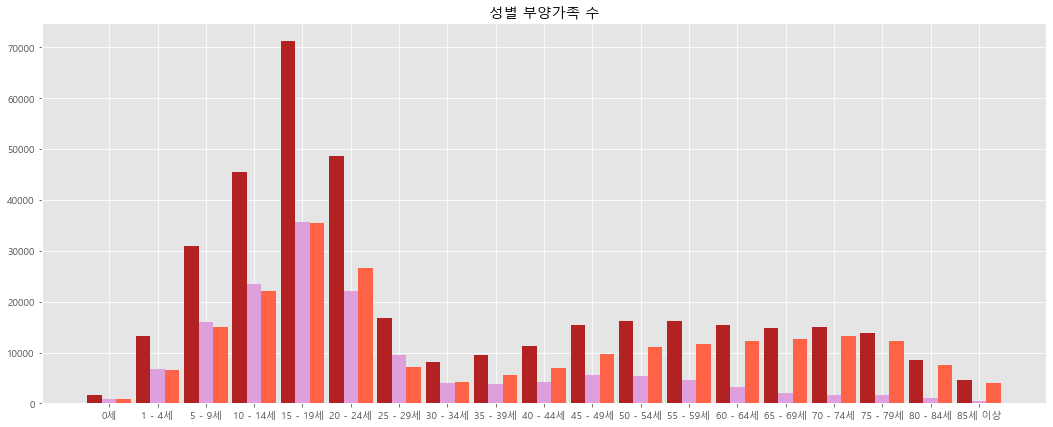

In [89]:
w_ = 0.3
plt.figure(figsize=(18,7))
x = np.arange(len(idx))
pyplot.bar(range(len(all_dependents_sum_list)), all_dependents_sum_list, width=w_, color='firebrick')
pyplot.bar([i+w_ for i in range(len(dependents_man_sum_list))], dependents_man_sum_list, width=w_, color='plum')
pyplot.bar([i+2*w_ for i in range(len(dependents_woman_sum_list))], dependents_woman_sum_list, width=w_, color='tomato')
pyplot.title("성별 부양가족 수")
pyplot.xticks([i+w_ for i in range(len(dependents_man_sum_list))], idx)
pyplot.show()

## 성별 부양가족 수
#### 1. 성별 부양가족 수는 청소년기까지 증가하다가 성인이 된이후에 급격하게 감소한다.
#### 2. 남성의 경우 비슷한 수치를 보이다가 50대 중후반이 되면서 부양가족 수가 꾸준히 감소한다.
#### 3. 여성의 경우 30대 후반 이후 부양가족 수가 지속적으로 증가한다.

In [90]:
area = []
print(medical_care.loc[10, '2019'])

for i in range(10, 61, 3):
    area.append(int(medical_care.loc[i, '2019']))
print(area)
idx2 = ['서울', '부산', '대구', '인천', '광주', '대전', '울산', '세종', '경기', '강원', '충북', '충남', '전북', '전남', '경북', '경남', '제주']
print(idx2)
print(len(area), len(idx2))

250669
[250669, 138667, 96969, 95978, 63430, 48089, 19640, 4129, 243001, 58383, 48215, 55753, 85041, 72205, 94941, 94078, 19658]
['서울', '부산', '대구', '인천', '광주', '대전', '울산', '세종', '경기', '강원', '충북', '충남', '전북', '전남', '경북', '경남', '제주']
17 17


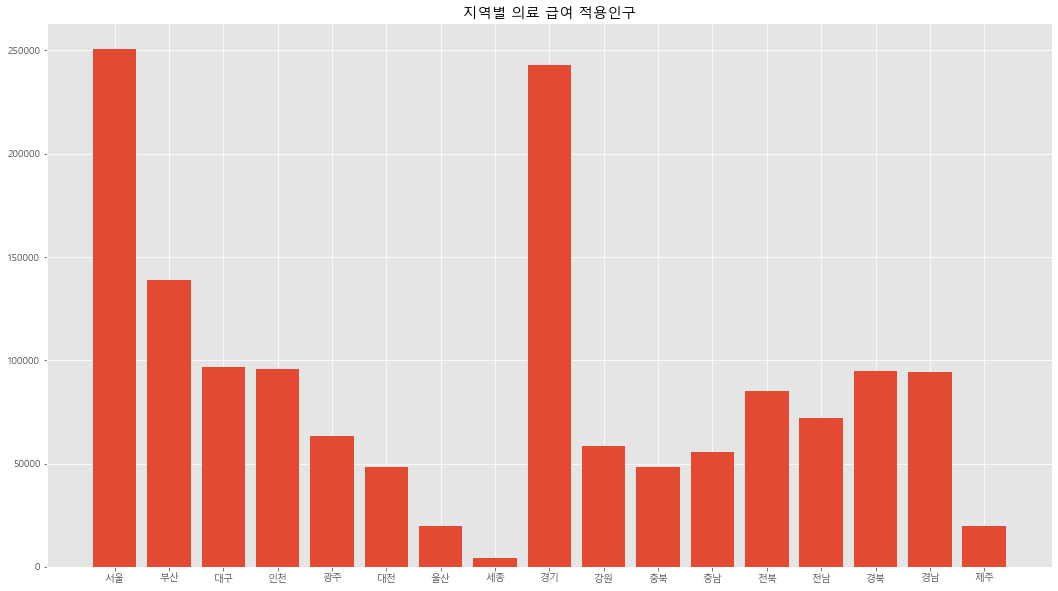

In [91]:
plt.figure(figsize=(18,10))
x = np.arange(len(idx2))
years = idx2
values = area

plt.bar(x, values)
plt.xticks(x, years)
plt.title("지역별 의료 급여 적용인구")
plt.show()

## 지역별 의료급여 적용인구
#### 1. 서울, 경기 권의 의료급여 적용 인구가 가장 많은 것으로 파악된다.
#### 2. 이후 부산, 대구, 인천, 경북, 경남 순으로 나타난다.
#### 3. 울산, 대전, 세종은 광역시와 신도시임에도 불구하고 상대적으로 의료급여 적용인구 수가 적다.

In [92]:
area_man_sum=[]

for i in range(11, 62, 3):
    area_man_sum.append(int(medical_care.loc[i, '2019']))
print(area_man_sum)

[118707, 64021, 43367, 43686, 29070, 22163, 9186, 1956, 110372, 26935, 22336, 25852, 38855, 34221, 43132, 43794, 9078]


In [93]:
area_woman_sum = []
for i in range(12, 63, 3):
    area_woman_sum.append(int(medical_care.loc[i, '2019']))
print(area_woman_sum)

[131962, 74646, 53602, 52292, 34360, 25926, 10454, 2173, 132629, 31448, 25879, 29901, 46186, 37984, 51809, 50284, 10580]


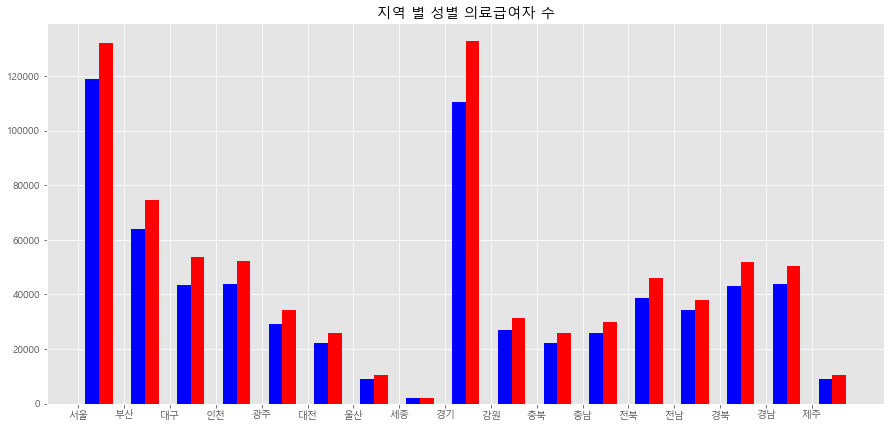

In [94]:
w_ = 0.3
plt.figure(figsize=(15,7))
x = np.arange(len(idx2))

pyplot.bar([i+w_ for i in range(len(area_man_sum))], area_man_sum, color='b', width=w_)
pyplot.bar([i+2*w_ for i in range(len(area_woman_sum))], area_woman_sum, color='r', width=w_)
pyplot.title("지역 별 성별 의료급여자 수")
pyplot.xticks(x, idx2)
pyplot.show()

## 지역 별 성별 의료급여자 수
#### 1. 거의 모든 도시에서 여성의 의료급여자수가 높게 나타난다.

In [95]:
print(sum(area))

1488846


In [96]:
man_ratio = round(sum(man_sum_list)/sum(area)*100, 2)
woman_ratio = round(sum(woman_sum_list)/sum(area)*100, 2)
print(man_ratio, woman_ratio)
idx3 = ['남', '여']

46.13 53.87


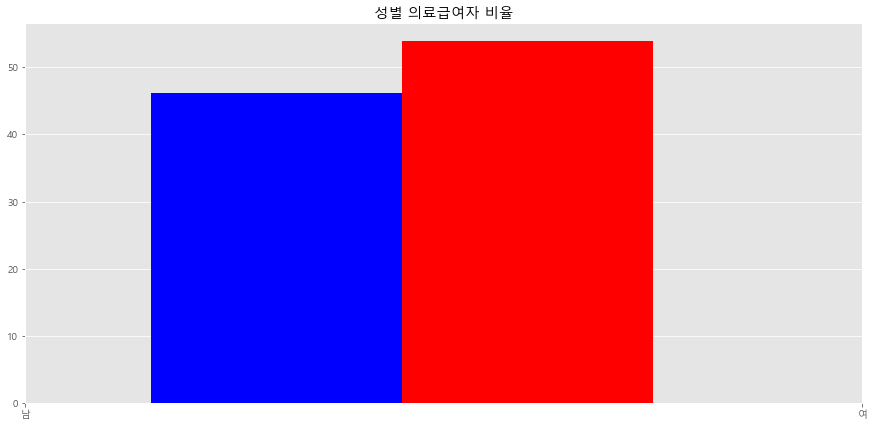

In [97]:
w_ = 0.3
plt.figure(figsize=(15,7))
x = np.arange(2)

pyplot.bar([i+w_ for i in range(1)], man_ratio, color='b', width=w_)
pyplot.bar([i+2*w_ for i in range(1)], woman_ratio, color='r', width=w_)
pyplot.title("성별 의료급여자 비율")
pyplot.xticks(x, idx3)
pyplot.show()

## 여성의 의료급여 적용 비율이 상대적으로 더 높다.

In [98]:
area_ratio = []

for i in range(len(idx2)):
    area_ratio.append(round(area[i]/sum(area)*100,2))
print(area_ratio)

[16.84, 9.31, 6.51, 6.45, 4.26, 3.23, 1.32, 0.28, 16.32, 3.92, 3.24, 3.74, 5.71, 4.85, 6.38, 6.32, 1.32]


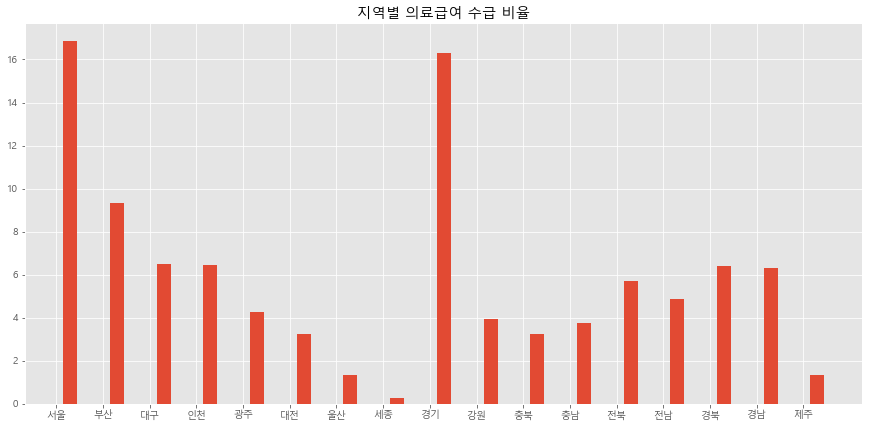

In [99]:
w_ = 0.3
plt.figure(figsize=(15,7))
x = np.arange(len(idx2))
pyplot.bar([i+w_ for i in range(len(area_ratio))], area_ratio, width=w_)
pyplot.title("지역별 의료급여 수급 비율")
pyplot.xticks(x, idx2)
pyplot.show()

In [100]:
population_data = pd.read_csv('./행정구역_시군구_별__성별_인구수_20210331235723.csv')

In [101]:
population = population_data

In [102]:
population

,행정구역(시군구)별,2019. 12,2019. 12.1,2019. 12.2,2019,2019.1,2019.2
0,행정구역(시군구)별,총인구수 (명),남자인구수 (명),여자인구수 (명),총인구수 (명),남자인구수 (명),여자인구수 (명)
1,전국,51849861,25864816,25985045,51849861,25864816,25985045
2,서울특별시,9729107,4744059,4985048,9729107,4744059,4985048
3,부산광역시,3413841,1675417,1738424,3413841,1675417,1738424
4,대구광역시,2438031,1205286,1232745,2438031,1205286,1232745
5,인천광역시,2957026,1482249,1474777,2957026,1482249,1474777
6,광주광역시,1456468,720740,735728,1456468,720740,735728
7,대전광역시,1474870,736607,738263,1474870,736607,738263
8,울산광역시,1148019,589712,558307,1148019,589712,558307
9,세종특별자치시,340575,169845,170730,340575,169845,170730


In [103]:
population.columns

Index(['행정구역(시군구)별', '2019. 12', '2019. 12.1', '2019. 12.2', '2019', '2019.1',
       '2019.2'],
      dtype='object')

In [104]:
print(population.loc[2:, '2019. 12':'2019. 12.2'])

    2019. 12 2019. 12.1 2019. 12.2
2    9729107    4744059    4985048
3    3413841    1675417    1738424
4    2438031    1205286    1232745
5    2957026    1482249    1474777
6    1456468     720740     735728
7    1474870     736607     738263
8    1148019     589712     558307
9     340575     169845     170730
10  13239666    6659995    6579671
11   1541502     775386     766116
12   1600007     810384     789623
13   2123709    1081938    1041771
14   1818917     904110     914807
15   1868745     937674     931071
16   2665836    1342037    1323799
17   3362553    1692032    1670521
18    670989     337345     333644


In [105]:
all_population = list(population.loc[2:, '2019. 12'].astype('int64'))

In [106]:
print(all_population, len(all_population))

[9729107, 3413841, 2438031, 2957026, 1456468, 1474870, 1148019, 340575, 13239666, 1541502, 1600007, 2123709, 1818917, 1868745, 2665836, 3362553, 670989] 17


In [107]:
print(np.array(area)/np.array(all_population)*100)
area_medical_ratio = list(np.array(area)/np.array(all_population)*100)
print(area_medical_ratio)

[2.57648518 4.06190564 3.97734893 3.24576111 4.3550562  3.26055856
 1.71077308 1.21236145 1.83540129 3.78740994 3.01342432 2.62526551
 4.67536452 3.86382305 3.56139688 2.79781464 2.92970526]
[2.5764851799862, 4.061905636495665, 3.977348934447511, 3.2457611126855155, 4.355056204461753, 3.2605585577033906, 1.7107730795396243, 1.2123614475519342, 1.835401285802829, 3.7874099417321547, 3.0134243162686163, 2.625265514248892, 4.675364516357811, 3.8638230470181862, 3.5613968751266016, 2.7978146366763585, 2.9297052559728995]


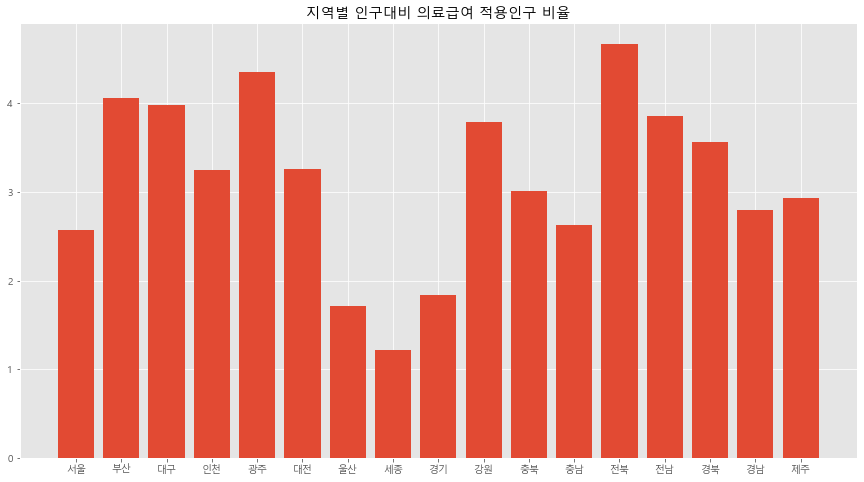

In [108]:
plt.figure(figsize=(15, 8))
x = np.arange(len(idx2))
years = idx2
values = area_medical_ratio

plt.bar(x, values)
plt.xticks(x, years)
plt.title("지역별 인구대비 의료급여 적용인구 비율")
plt.show()

## 지역별 인구대비 의료급여 적용인구 비율

### 서울과 경기가 다른 시도에 비해 의료급여 적용인구 비율이 낮다는 것을 알 수 있다.

In [109]:
by_age_data = pd.read_csv('./연령_및_성별_인구__시군구.csv')
by_age_population = by_age_data
by_age_population.head()

,행정구역별(시군구),연령별,2016,2016.1,2016.2,2016.3
0,행정구역별(시군구),연령별,인구(내국인) (명),남자 (명),여자 (명),성비
1,서울특별시,합계,9470339,4636374,4833965,95.9
2,서울특별시,0~4세,371239,190370,180869,105.3
3,서울특별시,5~9세,365059,187265,177794,105.3
4,서울특별시,10~14세,376506,194431,182075,106.8


In [110]:
print(by_age_population.loc[1, '2016'])

9470339


In [111]:
print(by_age_population.loc[12:19, '2016'])

12    734368
13    763943
14    598732
15    435313
16    336992
17    240627
18    132351
19     84082
Name: 2016, dtype: object


In [112]:
over_fifty_ratio = []
area_over_fifty = []
seoul_population = int(by_age_population.loc[1, '2016'])
print(seoul_population)

9470339


In [113]:
seoul_over_fifty = sum(list(by_age_population.loc[12:19, '2016'].astype('int64')))
print(seoul_over_fifty)

over_fifty_ratio.append(round((seoul_over_fifty/seoul_population)*100, 2))
print(over_fifty_ratio)
area_over_fifty.append(seoul_over_fifty)
print(area_over_fifty)

3326408
[35.12]
[3326408]


In [114]:
print(by_age_population.loc[25, '2016'])

3394316


In [115]:
busan_population = int(by_age_population.loc[25, '2016'])
print(busan_population)

3394316


In [116]:
busan_over_fifty = sum(list(by_age_population.loc[36:43, '2016'].astype('int64')))
print(busan_over_fifty)
over_fifty_ratio.append(round((busan_over_fifty/busan_population)*100, 2))
print(over_fifty_ratio)
area_over_fifty.append(busan_over_fifty)
print(area_over_fifty)

1367294
[35.12, 40.28]
[3326408, 1367294]


In [117]:
daegu_population = int(by_age_population.loc[49, '2016'])
print(by_age_population.loc[49, '2016'])

2430510


In [118]:
print(by_age_population.loc[60:67, '2016'])

60    208701
61    205773
62    153802
63    111690
64     81996
65     66802
66     40347
67     22678
Name: 2016, dtype: object


In [119]:
daegu_over_fifty = sum(list(by_age_population.loc[60:67, '2016'].astype('int64')))
print(daegu_over_fifty) 
over_fifty_ratio.append(round((daegu_over_fifty/daegu_population)*100, 2))
print(over_fifty_ratio)
area_over_fifty.append(daegu_over_fifty)
print(area_over_fifty)

891789
[35.12, 40.28, 36.69]
[3326408, 1367294, 891789]


In [120]:
incheon_population = int(by_age_population.loc[73, '2016'])
print(by_age_population.loc[73, '2016'])

2841151


In [121]:
print(by_age_population.loc[84:91, '2016'])

84    246810
85    240439
86    160142
87    106421
88     81859
89     62698
90     39320
91     26594
Name: 2016, dtype: object


In [122]:
incheon_over_fifty = sum(list(by_age_population.loc[84:91, '2016'].astype('int64')))
print(incheon_over_fifty)
over_fifty_ratio.append(round((incheon_over_fifty/incheon_population)*100, 2))
print(over_fifty_ratio)
area_over_fifty.append(incheon_over_fifty)
print(area_over_fifty)

964283
[35.12, 40.28, 36.69, 33.94]
[3326408, 1367294, 891789, 964283]


In [123]:
print(by_age_population.loc[97, '2016'])
gwangju_population = int(by_age_population.loc[97, '2016'])

1477856


In [124]:
print(by_age_population.loc[108:115, '2016'])
gwangju_over_fifty = sum(list(by_age_population.loc[108:115, '2016'].astype('int64')))
over_fifty_ratio.append(round((gwangju_over_fifty/gwangju_population)*100, 2))
print(over_fifty_ratio)
area_over_fifty.append(gwangju_over_fifty)
print(area_over_fifty)

108    116006
109    110190
110     74989
111     59030
112     45256
113     34711
114     21054
115     14465
Name: 2016, dtype: object
[35.12, 40.28, 36.69, 33.94, 32.19]
[3326408, 1367294, 891789, 964283, 475701]


In [125]:
print(by_age_population.loc[121, '2016'])

1515758


In [126]:
daejeon_population = int(by_age_population.loc[121, '2016'])
print(daejeon)

NameError: name 'daejeon' is not defined

In [127]:
print(by_age_population.loc[132:139, '2016'])

132    117174
133    118164
134     83973
135     57464
136     43738
137     33729
138     21571
139     14146
Name: 2016, dtype: object


In [128]:
daejeon_over_fifty = sum(list(by_age_population.loc[132:139, '2016'].astype('int64')))
print(daejeon_over_fifty)
over_fifty_ratio.append(round((daejeon_over_fifty/daejeon_population)*100, 2))
print(over_fifty_ratio)
area_over_fifty.append(daejeon_over_fifty)
print(area_over_fifty)

489959
[35.12, 40.28, 36.69, 33.94, 32.19, 32.32]
[3326408, 1367294, 891789, 964283, 475701, 489959]


In [129]:
print(by_age_population.loc[145, '2016'])
ulsan_population = int(by_age_population.loc[145, '2016'])

1137241


In [130]:
print(by_age_population.loc[156:163, '2016'])
ulsan_over_fifty = sum(list(by_age_population.loc[156:163, '2016'].astype('int64')))
over_fifty_ratio.append(round((ulsan_over_fifty/ulsan_population)*100, 2))
print(over_fifty_ratio)
area_over_fifty.append(ulsan_over_fifty)
print(area_over_fifty)

156    103171
157     97004
158     64918
159     40885
160     26842
161     19596
162     11685
163      7269
Name: 2016, dtype: object
[35.12, 40.28, 36.69, 33.94, 32.19, 32.32, 32.66]
[3326408, 1367294, 891789, 964283, 475701, 489959, 371370]


In [131]:
print(by_age_population.loc[169, '2016'])
sejong_population = int(by_age_population.loc[169, '2016'])
print(by_age_population.loc[180:187, '2016'])
sejong_over_fifty = sum(list(by_age_population.loc[180:187, '2016'].astype('int64')))
over_fifty_ratio.append(round((sejong_over_fifty/sejong_population)*100, 2))
print(over_fifty_ratio)
area_over_fifty.append(sejong_over_fifty)
print(area_over_fifty)

237672
180    13951
181    13517
182    10079
183     7078
184     5560
185     4817
186     3275
187     2130
Name: 2016, dtype: object
[35.12, 40.28, 36.69, 33.94, 32.19, 32.32, 32.66, 25.42]
[3326408, 1367294, 891789, 964283, 475701, 489959, 371370, 60407]


In [132]:
print(by_age_population.loc[193, '2016'])
print(by_age_population.loc[204:211, '2016'])
gyeonggi_population = int(by_age_population.loc[193, '2016'])
gyeonggi_over_fifty = sum(list(by_age_population.loc[204:211, '2016'].astype('int64')))
over_fifty_ratio.append(round((gyeonggi_over_fifty/gyeonggi_population)*100, 2))
print(over_fifty_ratio)
area_over_fifty.append(gyeonggi_over_fifty)
print(area_over_fifty)

12199257
204    1003764
205     940329
206     639097
207     430447
208     348702
209     277523
210     171786
211     113196
Name: 2016, dtype: object
[35.12, 40.28, 36.69, 33.94, 32.19, 32.32, 32.66, 25.42, 32.17]
[3326408, 1367294, 891789, 964283, 475701, 489959, 371370, 60407, 3924844]


In [133]:
gangwon_population = int(by_age_population.loc[217, '2016'])
print(by_age_population.loc[217, '2016'])

1502387


In [134]:
print(by_age_population.loc[228:235, '2016'])
gangwon_over_fifty = sum(list(by_age_population.loc[228:235, '2016'].astype('int64')))
over_fifty_ratio.append(round((gangwon_over_fifty/gangwon_population)*100, 2))
print(over_fifty_ratio)
area_over_fifty.append(gangwon_over_fifty)
print(area_over_fifty)

228    122535
229    137941
230    105785
231     69228
232     68721
233     60625
234     34797
235     24297
Name: 2016, dtype: object
[35.12, 40.28, 36.69, 33.94, 32.19, 32.32, 32.66, 25.42, 32.17, 41.53]
[3326408, 1367294, 891789, 964283, 475701, 489959, 371370, 60407, 3924844, 623929]


In [135]:
chungbuk_population = int(by_age_population.loc[241, '2016'])
print(by_age_population.loc[241, '2016'])
print(by_age_population.loc[252:259, '2016'])
chungbuk_over_fifty = sum(list(by_age_population.loc[252:259, '2016'].astype('int64')))
over_fifty_ratio.append(round((chungbuk_over_fifty/chungbuk_population)*100, 2))
print(over_fifty_ratio)
area_over_fifty.append(chungbuk_over_fifty)
print(area_over_fifty)

1558503
252    123802
253    131247
254     98139
255     65921
256     59066
257     52971
258     35130
259     21044
Name: 2016, dtype: object
[35.12, 40.28, 36.69, 33.94, 32.19, 32.32, 32.66, 25.42, 32.17, 41.53, 37.68]
[3326408, 1367294, 891789, 964283, 475701, 489959, 371370, 60407, 3924844, 623929, 587320]


In [136]:
chungnam_population = int(by_age_population.loc[265, '2016'])
print(by_age_population.loc[265, '2016'])
print(by_age_population.loc[276:283, '2016'])
chungnam_over_fifty = sum(list(by_age_population.loc[276:283, '2016'].astype('int64')))
over_fifty_ratio.append(round((chungnam_over_fifty/chungnam_population)*100, 2))
print(over_fifty_ratio)
area_over_fifty.append(chungnam_over_fifty)
print(area_over_fifty)

2055033
276    151996
277    159233
278    121018
279     96161
280     79927
281     74883
282     55021
283     32779
Name: 2016, dtype: object
[35.12, 40.28, 36.69, 33.94, 32.19, 32.32, 32.66, 25.42, 32.17, 41.53, 37.68, 37.52]
[3326408, 1367294, 891789, 964283, 475701, 489959, 371370, 60407, 3924844, 623929, 587320, 771018]


In [137]:

jeollabukdo_population = int(by_age_population.loc[289, '2016'])
print(by_age_population.loc[289, '2016'])
print(by_age_population.loc[300:307, '2016'])
jeollabukdo_over_fifty = sum(list(by_age_population.loc[300:307, '2016'].astype('int64')))
over_fifty_ratio.append(round((jeollabukdo_over_fifty/jeollabukdo_population)*100, 2))
print(over_fifty_ratio)
area_over_fifty.append(jeollabukdo_over_fifty)
print(area_over_fifty)

1801619
300    139518
301    146522
302    113955
303     97098
304     81006
305     71207
306     49915
307     31926
Name: 2016, dtype: object
[35.12, 40.28, 36.69, 33.94, 32.19, 32.32, 32.66, 25.42, 32.17, 41.53, 37.68, 37.52, 40.58]
[3326408, 1367294, 891789, 964283, 475701, 489959, 371370, 60407, 3924844, 623929, 587320, 771018, 731147]


In [138]:
jeollanamdo_population = int(by_age_population.loc[313, '2016'])
print(by_age_population.loc[313, '2016'])
print(by_age_population.loc[324:331, '2016'])
jeollanamdo_over_fifty = sum(list(by_age_population.loc[324:331, '2016'].astype('int64')))
over_fifty_ratio.append(round((jeollanamdo_over_fifty/jeollanamdo_population)*100, 2))
print(over_fifty_ratio)
area_over_fifty.append(jeollanamdo_over_fifty)
print(area_over_fifty)

1759387
324    141081
325    149821
326    113563
327    103368
328     92052
329     87885
330     55751
331     36358
Name: 2016, dtype: object
[35.12, 40.28, 36.69, 33.94, 32.19, 32.32, 32.66, 25.42, 32.17, 41.53, 37.68, 37.52, 40.58, 44.33]
[3326408, 1367294, 891789, 964283, 475701, 489959, 371370, 60407, 3924844, 623929, 587320, 771018, 731147, 779879]


In [139]:
gyeongsangbukdo_population = int(by_age_population.loc[337, '2016'])
print(by_age_population.loc[337, '2016'])
print(by_age_population.loc[348:355, '2016'])
gyeongsangbukdo_over_fifty = sum(list(by_age_population.loc[348:355, '2016'].astype('int64')))
over_fifty_ratio.append(round((gyeongsangbukdo_over_fifty/gyeongsangbukdo_population)*100, 2))
print(over_fifty_ratio)
area_over_fifty.append(gyeongsangbukdo_over_fifty)
print(area_over_fifty)

2621463
348    213705
349    228464
350    183407
351    140488
352    113426
353    107396
354     72093
355     44533
Name: 2016, dtype: object
[35.12, 40.28, 36.69, 33.94, 32.19, 32.32, 32.66, 25.42, 32.17, 41.53, 37.68, 37.52, 40.58, 44.33, 42.1]
[3326408, 1367294, 891789, 964283, 475701, 489959, 371370, 60407, 3924844, 623929, 587320, 771018, 731147, 779879, 1103512]


In [140]:
gyeongsangnamdo_population = int(by_age_population.loc[361, '2016'])
print(by_age_population.loc[361, '2016'])
print(by_age_population.loc[372:379, '2016'])
gyeongsangnamdo_over_fifty = sum(list(by_age_population.loc[372:379, '2016'].astype('int64')))
over_fifty_ratio.append(round((gyeongsangnamdo_over_fifty/gyeongsangnamdo_population)*100, 2))
print(over_fifty_ratio)
area_over_fifty.append(gyeongsangnamdo_over_fifty)
print(area_over_fifty)

3247448
372    267481
373    273780
374    201854
375    146316
376    112522
377    100652
378     65702
379     40300
Name: 2016, dtype: object
[35.12, 40.28, 36.69, 33.94, 32.19, 32.32, 32.66, 25.42, 32.17, 41.53, 37.68, 37.52, 40.58, 44.33, 42.1, 37.22]
[3326408, 1367294, 891789, 964283, 475701, 489959, 371370, 60407, 3924844, 623929, 587320, 771018, 731147, 779879, 1103512, 1208607]


In [141]:
jeju_population = int(by_age_population.loc[385, '2016'])
print(by_age_population.loc[385, '2016'])
print(by_age_population.loc[396:403, '2016'])
jeju_over_fifty = sum(list(by_age_population.loc[396:403, '2016'].astype('int64')))
over_fifty_ratio.append(round((jeju_over_fifty/jeju_population)*100, 2))
print(over_fifty_ratio)
area_over_fifty.append(jeju_over_fifty)
print(area_over_fifty)

605856
396    49413
397    45484
398    33519
399    25629
400    21431
401    18136
402    12528
403     8511
Name: 2016, dtype: object
[35.12, 40.28, 36.69, 33.94, 32.19, 32.32, 32.66, 25.42, 32.17, 41.53, 37.68, 37.52, 40.58, 44.33, 42.1, 37.22, 35.43]
[3326408, 1367294, 891789, 964283, 475701, 489959, 371370, 60407, 3924844, 623929, 587320, 771018, 731147, 779879, 1103512, 1208607, 214651]


In [142]:
len(over_fifty_ratio)

17

In [143]:
print(sum(list(medical_care.loc[13, '2019.12':].astype('int64'))))

93500


In [144]:
medical_over_fifty = []
for i in range(10, 61, 3):
    medical_over_fifty.append(sum(list(medical_care.loc[i, '2019.12':].astype('int64'))))
print(medical_over_fifty)

[166860, 93500, 60678, 59184, 33495, 28530, 12623, 2549, 158470, 39348, 31110, 36100, 51363, 47117, 63315, 62236, 11815]


In [145]:
len(medical_over_fifty)

17

In [146]:
print(len(area_over_fifty))

17


In [147]:
print(list(np.array(medical_over_fifty)/np.array(area_over_fifty)*100))

[5.016221702208509, 6.838324456920018, 6.804075852023292, 6.137617276256037, 7.041187636771838, 5.822936204866122, 3.399036001831058, 4.219709636300429, 4.037612705116433, 6.306486795773238, 5.296942041817068, 4.682121558770353, 7.024989502794924, 6.041578244830288, 5.737590529146941, 5.149399267090129, 5.504283697723281]


In [148]:
area_medical_over_fifty = list(np.array(medical_over_fifty)/np.array(area_over_fifty)*100)


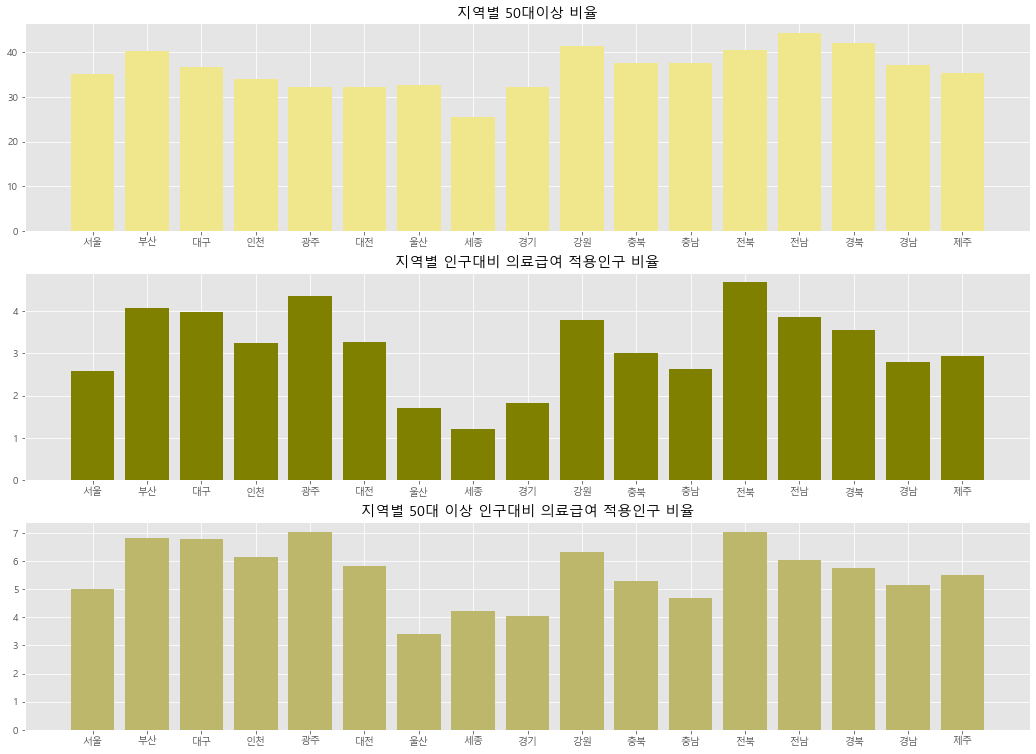

In [151]:
fig = plt.figure()
fig.set_size_inches(18,13)
ax1 = fig.add_subplot(3, 1, 1)
ax2 = fig.add_subplot(3, 1, 2)
ax3 = fig.add_subplot(3, 1, 3)

x = idx2
y = over_fifty_ratio
w = area_medical_ratio
z = area_medical_over_fifty

ax1.bar(x, y, color='khaki')
ax1.set_title('지역별 50대이상 비율')
ax2.bar(x, w, color='olive')
ax2.set_title('지역별 인구대비 의료급여 적용인구 비율')
ax3.bar(x, z, color='darkkhaki')
ax3.set_title('지역별 50대 이상 인구대비 의료급여 적용인구 비율')
plt.show()

## 지역 별 50대 이상 인구 비율
### 전남이 가장 높은 비율을 차지하고 있다.
### 세종이 가장 낮은 비율을 차지하고 있다.
### 인천, 광주, 대전은 50대 이상 인구 비율이 비슷하지만 의료급여 적용인구 비율은 광주가 다른 시도에 비해서 높다.
### 서울, 경기는 생각보다 의료급여 적용인구 비율이 낮다는 것을 알 수 있다.
### 세종시의 평균 연령은 36.1세다. 그래서 의료급여 적용 인구 비율이 낮다고 생각된다.

In [270]:
print(sum(list(by_age_population.loc[12:14, '2016'].astype('int64'))))

12    734368
13    763943
14    598732
Name: 2016, dtype: object


In [273]:
fifty_to_sixtyfive = sum(list(by_age_population.loc[12:14, '2016'].astype('int64')))
print(round(fifty_to_sixtyfive*0.136, 2))

209704.3


In [313]:
over_seventy = []
print(by_age_population.loc[17:19, '2016'])

17    240627
18    132351
19     84082
Name: 2016, dtype: object


In [314]:
print(sum(by_age_population.loc[41:43, '2016'].astype('int64')))

198408


In [315]:
for i in range(17, 409, 24):
    over_seventy.append(sum(by_age_population.loc[i:i+2, '2016'].astype('int64')))
print(over_seventy)

[457060, 198408, 129827, 128612, 70230, 69446, 38550, 10222, 562505, 119719, 109145, 162683, 153048, 179994, 224022, 206654, 39175]


In [322]:
sum(over_seventy)*0.556

1589770.8

In [317]:
over_fifty = []
print(by_age_population.loc[15:16, '2016'])

15    435313
16    336992
Name: 2016, dtype: object


In [318]:
for i in range(15, 409, 24):
    over_fifty.append(sum(by_age_population.loc[i:i+1, '2016'].astype('int64')))
print(over_fifty)

[772305, 324185, 193686, 188280, 104286, 101202, 67727, 12638, 779149, 137949, 124987, 176088, 178104, 195420, 253914, 258838, 47060]


In [320]:
print(sum(over_fifty)*0.337)

1319630.6660000002


In [323]:
print(sum(over_fifty)*0.337 + sum(over_seventy)*0.556)

2909401.466


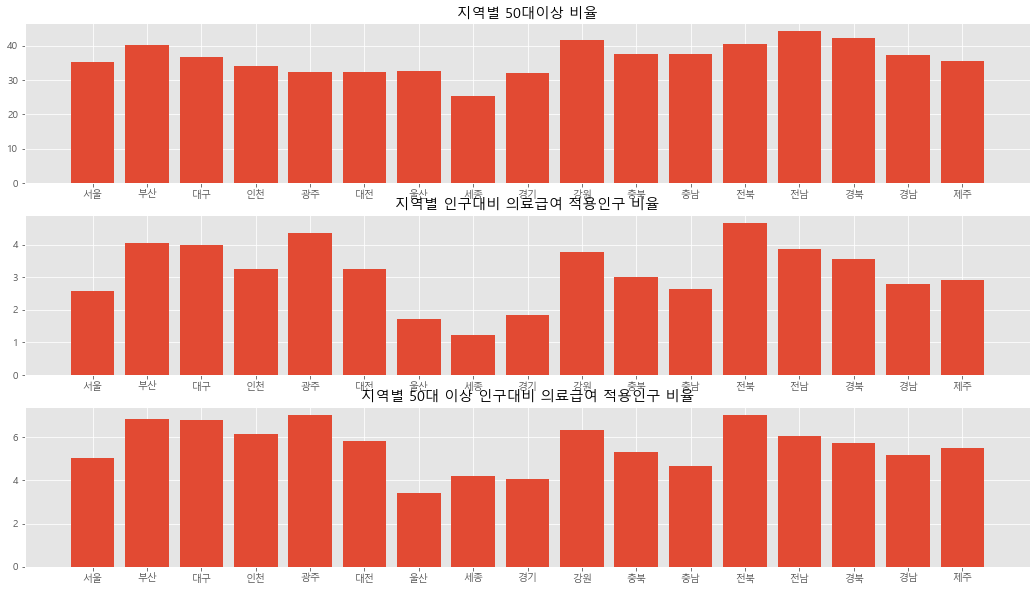

## 지역 별 50대 이상 인구 비율
### 전남이 가장 높은 비율을 차지하고 있다.
### 세종이 가장 낮은 비율을 차지하고 있다.
### 인천, 광주, 대전은 50대 이상 인구 비율이 비슷하지만 의료급여 적용인구 비율은 광주가 다른 시도에 비해서 높다.
### 서울, 경기는 생각보다 의료급여 적용인구 비율이 낮다는 것을 알 수 있다.
### 세종시의 평균 연령은 36.1세다. 그래서 의료급여 적용 인구 비율이 낮다고 생각된다.

## 최종적으로 구현하고 싶은 웹서비스

### 현재 기초생활수급자 수는 1881357이다. 의료급여 수급자 인구 수는 1488846이다.


###  66세 ~ 75세의 중위 소득 50%이하는 33.7%, 76세이상 중위소득 50%이하는 55.6%이다. 

### 전국적으로 66세 ~ 75세, 76세 이상 50%이하 중위 소득 인구수는 약 290만 이다. 

### 기초생활수급자는 약 190만인데 비해 66세이상 중위 소득 50%이하 인구수는 290만이므로 특정 불균형이 있는 것으로 생각된다.

### 개인적으로 정보의 불균형 때문에 당사자가 기초생활수급자 인지 알지 못하는 경우가 많다고 생각하여 설문 조사를 진행한 후 자신이 받을 수 있는 특정 의료 복지 혜택을 알려주는 웹서비스를 구현.

